In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (PolynomialFeatures)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

plt.rcParams.update({
    "text.usetex": True,       
    "font.family": "serif",    
    "font.size": 10, 
})


import matplotlib.style as mplstyle
mplstyle.use(['ggplot', 'fast'])

Text(0.5, 1.0, 'Bias-Variance trade-off \n Bootstrap resampling of linear regression')

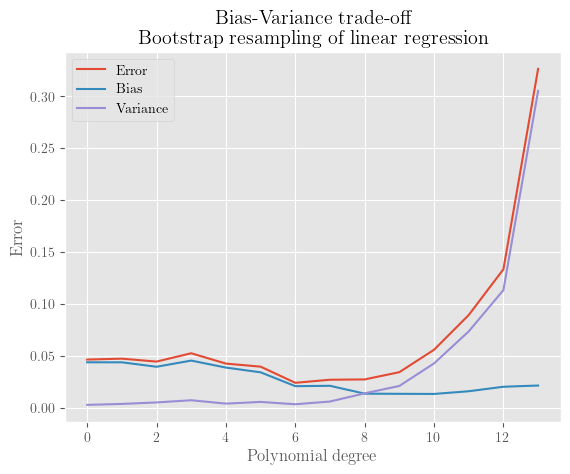

In [2]:
np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14

x = np.linspace(-1, 1, n).reshape(-1, 1)
y = 1/(1+25*x**2)+ np.random.normal(0, 0.1, x.shape)

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='Bias')
plt.plot(polydegree, variance, label='Variance')
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.legend()
plt.title('Bias-Variance trade-off \n Bootstrap resampling of linear regression')

Text(0.5, 1.0, 'Ridge Regression MSE Heatmap')

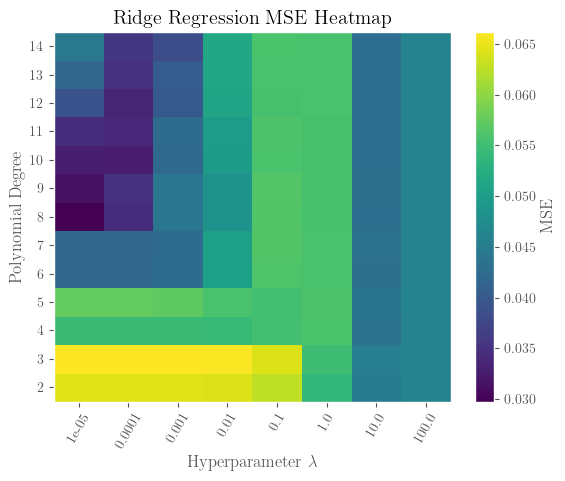

In [3]:
degrees = np.arange(2, 15)
lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1e1, 1e2]

mse_heatmap = np.zeros((len(degrees), len(lambdas)))

x = np.linspace(-1, 1, n).reshape(-1, 1)
y = 1/(1+25*x**2)+ np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for j, d in enumerate(degrees):
    for i, l in enumerate(lambdas):
        model = make_pipeline(
            PolynomialFeatures(d),
            Ridge(alpha=l, fit_intercept=False)
        )
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse_heatmap[j, i] = mean_squared_error(y_test, y_pred)

im = plt.imshow(mse_heatmap, aspect='auto', origin='lower')
plt.colorbar(im, label='MSE')

plt.xticks(np.arange(len(lambdas)), lambdas, rotation=60)
plt.yticks(np.arange(len(degrees)), degrees)

plt.xlabel(r'Hyperparameter $\lambda$')
plt.ylabel('Polynomial Degree')
plt.grid()
plt.title('Ridge Regression MSE Heatmap')